In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("winequalityN.csv")

### Let's get general information about our data

In [3]:
df.head(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [4]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
df.duplicated().sum()

1168

### Here we can see that the target's distribution of our data is not balanced and there are nulls and duplicates in different features

In [7]:
import matplotlib.pyplot as plt

### Let's see visualizations of  distribution for each features and target  distribution depand on type

<AxesSubplot:>

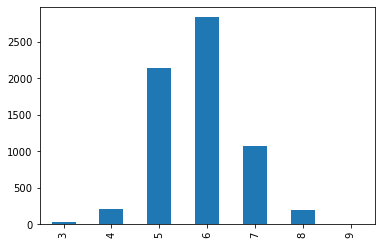

In [8]:
df['quality'].value_counts().sort_index().plot.bar()

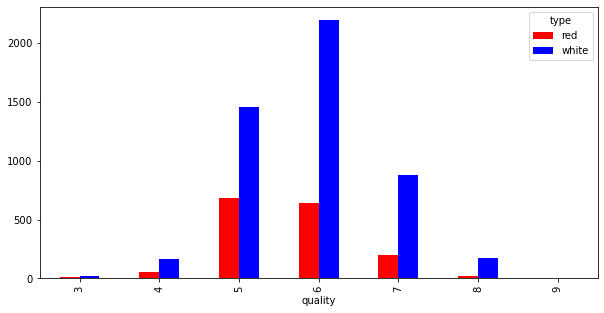

In [9]:
pd.crosstab(df["quality"], df['type']).plot(kind="bar", figsize=(10,5), color=["r", "b"]);

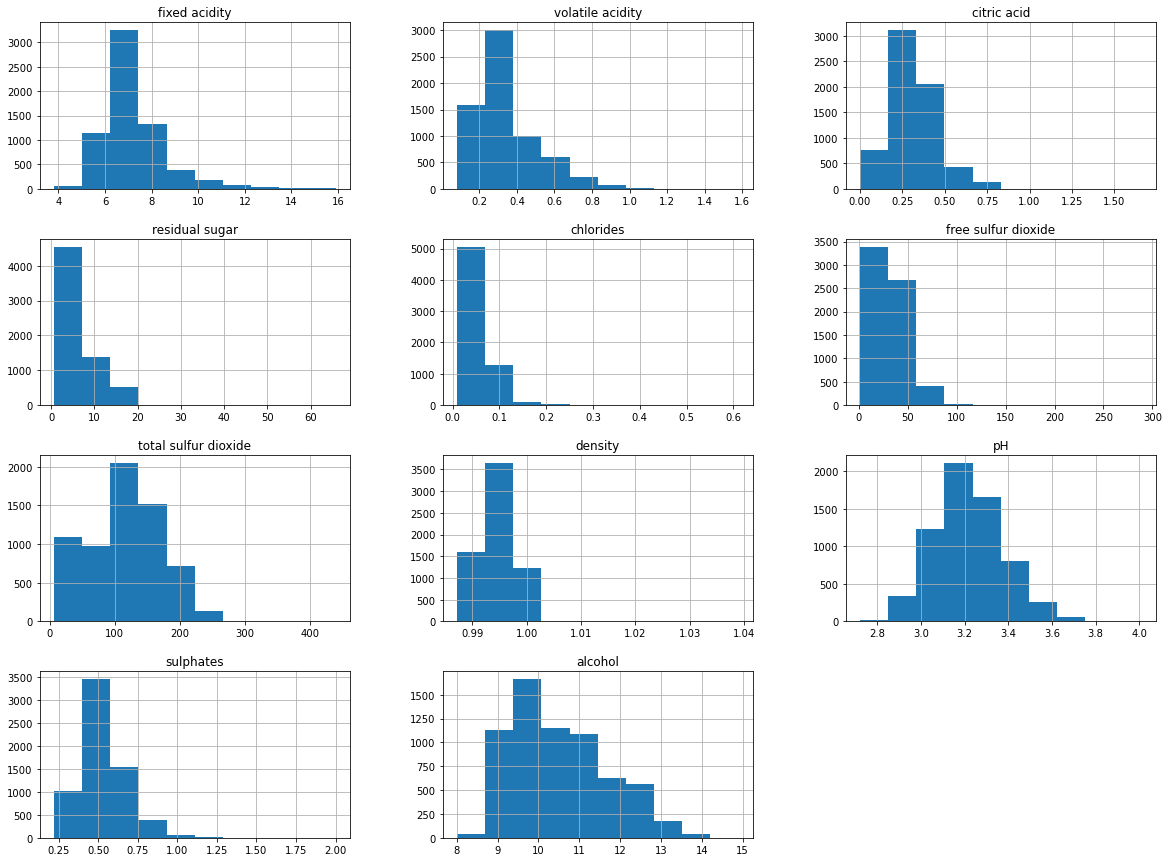

In [10]:
df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
    'total sulfur dioxide','density','pH','sulphates','alcohol']].hist(figsize=(20,15));

### Let's also check correlations 

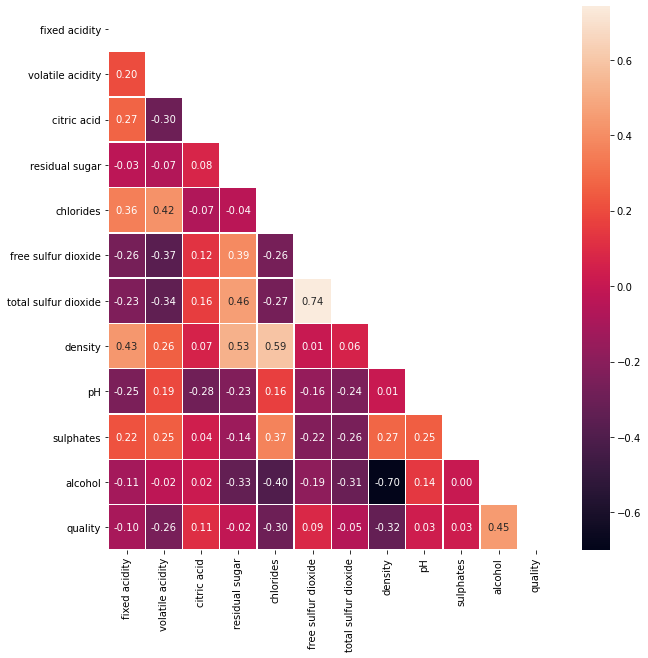

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
zeromask = np.zeros_like(df.corr()) #creates an array of zeros
triangle_indices = np.triu_indices_from(zeromask)
zeromask[triangle_indices] = True
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(method='spearman'),
            annot=True,
            linewidths=0.5,
            mask=zeromask,
            fmt= ".2f");

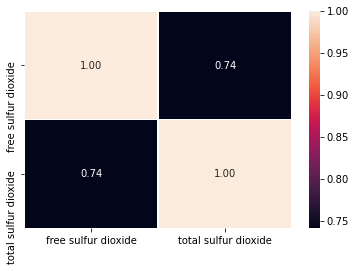

In [12]:
sns.heatmap(df[['free sulfur dioxide', 'total sulfur dioxide']].corr(method='spearman'), 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f");

### As you can see there is high correlation between 'free sulfur dioxide' and 'total sulfur dioxide' 

### Let's see also target distribution visualizations depand on each features with interactive ploting

In [13]:
from ipywidgets import interact, IntSlider, RadioButtons
import matplotlib.pyplot as plt
import seaborn as sns

def plot_each_feature(feature='alcohol'):    

    plt.figure(figsize=(7,3))
    plt.scatter(df['quality'], df[feature])
    plt.title(feature)
    plt.show()
interact(plot_each_feature, feature=RadioButtons(options=['alcohol', 'chlorides', 'citric acid', 'density', 'fixed acidity',
       'free sulfur dioxide', 'pH', 'residual sugar', 'sulphates',
       'total sulfur dioxide', 'type', 'volatile acidity'],
    description='Feauters:',
    disabled=False
));

interactive(children=(RadioButtons(description='Feauters:', options=('alcohol', 'chlorides', 'citric acid', 'd…

In [14]:
def boxplot_each_feature(feature='alcohol'):    
    
    plt.figure(figsize=(7,3))
    sns.boxplot(df[feature])
    plt.title(feature)
    plt.show()
interact(boxplot_each_feature, feature=RadioButtons(options=['alcohol', 'chlorides', 'citric acid', 'density', 'fixed acidity',
       'free sulfur dioxide', 'pH', 'residual sugar', 'sulphates',
       'total sulfur dioxide', 'volatile acidity'],
    description='Feauters:',
    disabled=False
));

interactive(children=(RadioButtons(description='Feauters:', options=('alcohol', 'chlorides', 'citric acid', 'd…

In [15]:
df.head(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


### Our hypothesises for solving classification problem with 7 classes(3, 4, 5, 6, 7, 8, 9)
1. We will use all features in modeling step (H1)

    -Fillna process with median strategy
    
    -StandardScaler process
    
    -OneHotEncoder process for categoric feature
    
2. We will drop 'free sulfur dioxide' and 'total sulfur dioxide' and will append new feature 'free sulfur dioxide'*'total sulfur dioxide' in modeling step (H2)

3. We will use all features in modeling step BUT...(H3)

    -Split data by 'type' column: red and white
    
    -Remove duplicates from dataset
    
    -Copy data without NaNs, and split by 'quality'
    
    -Remove outliers for each 'quality' dataset
    
    -Fill NaNs by mean/median values for each 'quality' dataset
    
    -Reconstract initial ordering of dataset and shuffle for modelling.